In [1]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = './GeoLite2-City-CSV_20231128/GeoLite2-City-Blocks-IPv4.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Extract two random values from the "Network" column
random_values = df['network']

# Display the randomly selected values
print(random_values)


0                1.0.0.0/24
1                1.0.1.0/24
2                1.0.2.0/23
3                1.0.4.0/22
4                1.0.8.0/21
                 ...       
3244244    223.255.244.0/22
3244245    223.255.248.0/22
3244246    223.255.252.0/23
3244247    223.255.254.0/24
3244248    223.255.255.0/24
Name: network, Length: 3244249, dtype: object


37.751
-97.822
21.1161
79.0706


/home/aquib/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


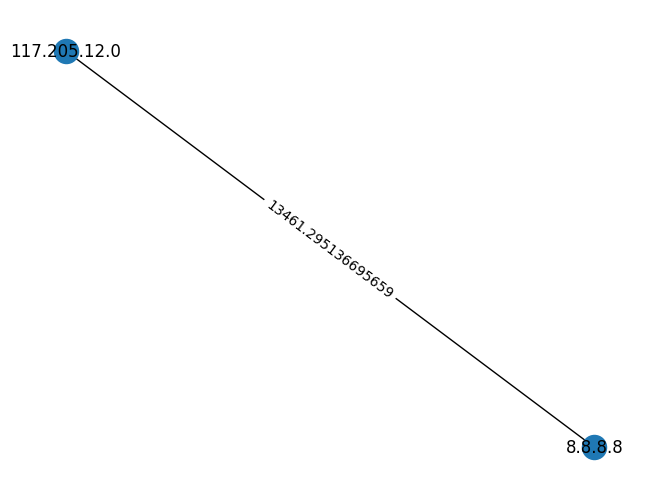

In [2]:
import geoip2.database
from math import radians, sin, cos, sqrt, atan2
import networkx as nx
import matplotlib.pyplot as plt

def haversine(lat1, lon1, lat2, lon2):

    print(lat1)
    print(lon1)
    print(lat2)
    print(lon2)
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers (change it to 3958.8 miles for miles)
    r = 6371.0

    # Calculate the distance
    distance = r * c

    return distance

def get_location(ip_address):
    # Replace 'path/to/your/database_file.mmdb' with the actual path to your GeoIP2 database file
    reader = geoip2.database.Reader('./GeoLite2-City_20231128/GeoLite2-City.mmdb')
    
    try:
        response = reader.city(ip_address)
        return response.location.latitude, response.location.longitude
    except geoip2.errors.AddressNotFoundError:
        return None

# Example IP addresses
ip1 = '8.8.8.8'  # Google's public DNS server
ip2 = '117.205.12.0'  # OpenDNS server

# Create a graph
G = nx.Graph()

# Get location for each IP address and add nodes to the graph
for ip in [ip1, ip2]:
    location = get_location(ip)
    if location:
        G.add_node(ip, pos=location)

# Calculate the distance and add an edge between the nodes
if ip1 in G.nodes and ip2 in G.nodes:
    distance = haversine(G.nodes[ip1]['pos'][0], G.nodes[ip1]['pos'][1], 
                         G.nodes[ip2]['pos'][0], G.nodes[ip2]['pos'][1])
    G.add_edge(ip1, ip2, weight=distance)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [3]:
import geoip2.database
from math import radians, sin, cos, sqrt, atan2
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers (change it to 3958.8 miles for miles)
    r = 6371.0

    # Calculate the distance
    distance = r * c

    return distance

def get_location(ip_address):
    # Replace 'path/to/your/database_file.mmdb' with the actual path to your GeoIP2 database file
    reader = geoip2.database.Reader('./GeoLite2-City_20231128/GeoLite2-City.mmdb')
    
    try:
        response = reader.city(ip_address)
        return response.location.latitude, response.location.longitude
    except geoip2.errors.AddressNotFoundError:
        return None

# Load 5 random rows from the CSV file with the selected IP addresses
selected_ips = pd.read_csv('./GeoLite2-City-CSV_20231128/GeoLite2-City-Blocks-IPv4.csv').sample(n=5)

# Trim IP addresses by removing everything after the last '/'
selected_ips['network'] = selected_ips['network'].apply(lambda x: x.rsplit('/', 1)[0] if '/' in x else x)

# Create a graph
G = nx.Graph()

# Get location for each trimmed IP address in the selected list and add nodes to the graph
for ip in selected_ips['network']:
    location = get_location(ip)
    if location:
        G.add_node(ip, pos=location)

# Calculate the distance and add edges between the nodes
for ip1 in G.nodes:
    for ip2 in G.nodes:
        if ip1 != ip2:
            distance = haversine(G.nodes[ip1]['pos'][0], G.nodes[ip1]['pos'][1], 
                                 G.nodes[ip2]['pos'][0], G.nodes[ip2]['pos'][1])
            G.add_edge(ip1, ip2, weight=distance)

# Draw the graph with improved layout and styling
pos = nx.spring_layout(G)  # Use spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
edge_labels = {(ip1, ip2): f"{distance:.2f} km" for ip1, ip2, distance in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=6)

plt.title('IP Addresses Network Graph')
plt.show()


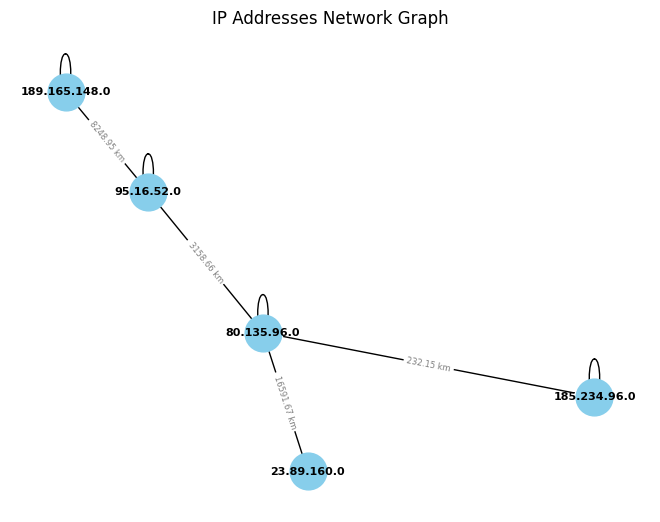

In [ ]:
import geoip2.database
from math import radians, sin, cos, sqrt, atan2
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

class IPAddressGraph:
    def __init__(self):
        self.G = nx.Graph()
        self.reader = geoip2.database.Reader('./GeoLite2-City_20231128/GeoLite2-City.mmdb')

    def haversine(self, lat1, lon1, lat2, lon2):
        # Convert latitude and longitude from degrees to radians
        lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

        # Haversine formula
        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        # Radius of Earth in kilometers (change it to 3958.8 miles for miles)
        r = 6371.0

        # Calculate the distance
        distance = r * c

        return distance

    def get_location(self, ip_address):
        try:
            response = self.reader.city(ip_address)
            return response.location.latitude, response.location.longitude
        except geoip2.errors.AddressNotFoundError:
            return None

    def add_node(self, ip):
        if ip not in self.G.nodes:
            location = self.get_location(ip)
            if location:
                self.G.add_node(ip, pos=location)

                # Connect the new node to the two nearest existing nodes
                existing_nodes = list(self.G.nodes)
                if len(existing_nodes) >= 2:
                    existing_nodes.sort(key=lambda x: self.haversine(
                        self.G.nodes[ip]['pos'][0], self.G.nodes[ip]['pos'][1],
                        self.G.nodes[x]['pos'][0], self.G.nodes[x]['pos'][1]
                    ))
                    nearest_nodes = existing_nodes[:2]
                    for node in nearest_nodes:
                        distance = self.haversine(
                            self.G.nodes[ip]['pos'][0], self.G.nodes[ip]['pos'][1],
                            self.G.nodes[node]['pos'][0], self.G.nodes[node]['pos'][1]
                        )
                        self.G.add_edge(ip, node, weight=distance)

    def draw_graph(self):
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
        edge_labels = {(ip1, ip2): f"{distance:.2f} km" for ip1, ip2, distance in self.G.edges(data='weight')}
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=edge_labels, font_color='gray', font_size=6)
        plt.title('IP Addresses Network Graph')
        plt.show()

# Usage example
ip_graph = IPAddressGraph()

# Load 5 random rows from the CSV file with the selected IP addresses
selected_ips = pd.read_csv('./GeoLite2-City-CSV_20231128/GeoLite2-City-Blocks-IPv4.csv').sample(n=5)

# Trim IP addresses by removing everything after the last '/'
selected_ips['network'] = selected_ips['network'].apply(lambda x: x.rsplit('/', 1)[0] if '/' in x else x)

# Add nodes to the graph using the module
for ip in selected_ips['network']:
    ip_graph.add_node(ip)

# Draw the graph
ip_graph.draw_graph()


/home/aquib/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


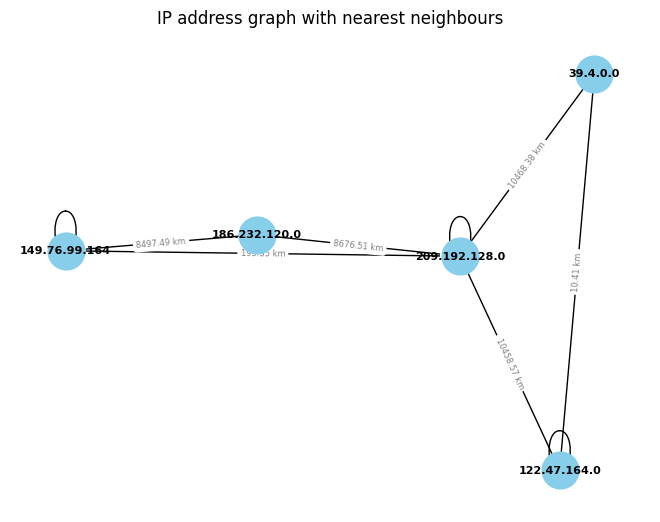

All nodes in the graph: ['186.232.120.0', '39.4.0.0', '209.192.128.0', '122.47.164.0', '149.76.99.164']
Randomly selected node: 122.47.164.0
Neighbors of 122.47.164.0: ['122.47.164.0', '39.4.0.0', '209.192.128.0']
Receiving times for all nodes after initial forwarding:
Packet ID: 1 received by 122.47.164.0 from 122.47.164.0 at 0.0
Packet ID: 1 received by 39.4.0.0 from 122.47.164.0 at 0.010410846016432076
Packet ID: 1 received by 209.192.128.0 from 122.47.164.0 at 10.458574320287198
Packet ID: 1 forwarded by 39.4.0.0 to 209.192.128.0 at 10.478792790174783
Packet ID: 1 forwarded by 39.4.0.0 to 122.47.164.0 at 0.02082169203286415
Packet ID: 1 forwarded by 209.192.128.0 to 209.192.128.0 at 10.458574320287198
Packet ID: 1 forwarded by 209.192.128.0 to 186.232.120.0 at 19.13508449316513
Packet ID: 1 forwarded by 209.192.128.0 to 39.4.0.0 at 20.92695626444555
Packet ID: 1 forwarded by 209.192.128.0 to 122.47.164.0 at 20.917148640574396
Packet ID: 1 forwarded by 209.192.128.0 to 149.76.99.164

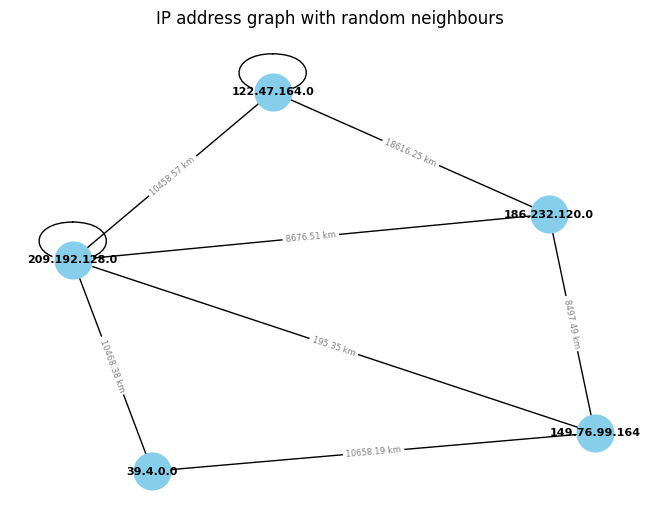

All nodes in the graph: ['186.232.120.0', '39.4.0.0', '209.192.128.0', '122.47.164.0', '149.76.99.164']
Randomly selected node: 122.47.164.0
Neighbors of 122.47.164.0: ['209.192.128.0', '186.232.120.0', '122.47.164.0']
Receiving times for all nodes after initial forwarding:
Packet ID: 1 received by 209.192.128.0 from 122.47.164.0 at 10.458574320287198
Packet ID: 1 received by 186.232.120.0 from 122.47.164.0 at 18.616251069058833
Packet ID: 1 received by 122.47.164.0 from 122.47.164.0 at 0.0
Packet ID: 1 forwarded by 209.192.128.0 to 186.232.120.0 at 19.13508449316513
Packet ID: 1 forwarded by 209.192.128.0 to 39.4.0.0 at 20.92695626444555
Packet ID: 1 forwarded by 209.192.128.0 to 209.192.128.0 at 10.458574320287198
Packet ID: 1 forwarded by 209.192.128.0 to 122.47.164.0 at 20.917148640574396
Packet ID: 1 forwarded by 209.192.128.0 to 149.76.99.164 at 10.653922127991793
Packet ID: 1 forwarded by 186.232.120.0 to 209.192.128.0 at 27.292761241936766
Packet ID: 1 forwarded by 186.232.120.

In [1]:
import geoip2.database
import random
from math import radians, sin, cos, sqrt, atan2
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate  # Ensure you have the 'tabulate' library installed
from collections import deque


class IPAddressGraph:
    def __init__(self):
        self.G = nx.Graph()
        self.reader = geoip2.database.Reader('./GeoLite2-City_20231128/GeoLite2-City.mmdb')
        self.receiving_times = {} 
        self.tmpran = []
         # Dictionary to store receiving times for nodes

    def haversine(self, lat1, lon1, lat2, lon2):
        # Convert latitude and longitude from degrees to radians
        lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

        # Haversine formula
        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        # Radius of Earth in kilometers (change it to 3958.8 miles for miles)
        r = 6371.0

        # Calculate the distance
        distance = r * c

        return distance

    def get_location(self, ip_address):
        try:
            response = self.reader.city(ip_address)
            return response.location.latitude, response.location.longitude
        except geoip2.errors.AddressNotFoundError:
            return None

    def add_node_connect_random(self, ip, num_connections=3):
        if ip not in self.G.nodes:
            location = self.get_location(ip)
            if location:
                self.G.add_node(ip, pos=location)

                # Connect the new node to randomly selected existing nodes
                existing_nodes = list(self.G.nodes)
                if len(existing_nodes) >= num_connections:
                    random_nodes = random.sample(existing_nodes, num_connections)
                    for node in random_nodes:
                        distance = self.haversine(
                            self.G.nodes[ip]['pos'][0], self.G.nodes[ip]['pos'][1],
                            self.G.nodes[node]['pos'][0], self.G.nodes[node]['pos'][1]
                        )
                        self.G.add_edge(ip, node, weight=distance)

    def add_node_connect_nearest(self, ip):
        if ip not in self.G.nodes:
            location = self.get_location(ip)
            if location:
                self.G.add_node(ip, pos=location)

                # Connect the new node to the two nearest existing nodes
                existing_nodes = list(self.G.nodes)
                if len(existing_nodes) >= 3:
                    existing_nodes.sort(key=lambda x: self.haversine(
                        self.G.nodes[ip]['pos'][0], self.G.nodes[ip]['pos'][1],
                        self.G.nodes[x]['pos'][0], self.G.nodes[x]['pos'][1]
                    ))
                    nearest_nodes = existing_nodes[:3]
                    for node in nearest_nodes:
                        distance = self.haversine(
                            self.G.nodes[ip]['pos'][0], self.G.nodes[ip]['pos'][1],
                            self.G.nodes[node]['pos'][0], self.G.nodes[node]['pos'][1]
                        )
                        self.G.add_edge(ip, node, weight=distance)

    def draw_graph(self, title='IP Addresses Network Graph'):
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
        edge_labels = {(ip1, ip2): f"{distance:.2f} km" for ip1, ip2, distance in self.G.edges(data='weight')}
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=edge_labels, font_color='gray', font_size=6)
        plt.title(title)
        plt.show()    
   

    def calculate_distances_table(self):
        distances = []
        nodes = list(self.G.nodes)
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                node1, node2 = nodes[i], nodes[j]
                distance = self.haversine(
                    self.G.nodes[node1]['pos'][0], self.G.nodes[node1]['pos'][1],
                    self.G.nodes[node2]['pos'][0], self.G.nodes[node2]['pos'][1]
                )
                distances.append({'Node 1': node1, 'Node 2': node2, 'Distance (km)': distance})
        distances_df = pd.DataFrame(distances)
        print(tabulate(distances_df, headers='keys', tablefmt='pretty'))

        

    # def calculate_convergence_time(self):
    #     # Check if the graph has nodes
    #     if not self.G.nodes:
    #         print("The graph doesn't contain any nodes.")
    #         return

    #     # Get all nodes in the graph
    #     all_nodes = list(self.G.nodes)
    #     print(f"All nodes in the graph: {all_nodes}")

    #     # Select a random node from the graph
    #     random_node = random.choice(all_nodes)
    #     print(f"Randomly selected node: {random_node}")

    #     # Get neighbors of the selected node
    #     neighbors = list(self.G.neighbors(random_node))
    #     print(f"Neighbors of {random_node}: {neighbors}")

    #     # Start with a specific packet ID
    #     packet_id = 1

    #     # Record the expected receive times for each neighbor starting from 0 milliseconds
    #     receive_times = {}
    #     current_time = 0  # Start time from 0 milliseconds
    #     min_receive_times = {node: float('inf') for node in all_nodes}
    #     for neighbor in neighbors:
    #         distance = self.G.edges[random_node, neighbor]['weight']  # Distance between nodes
    #         delay_ms = distance / 1000  # Assuming 1000km is a 1ms delay
    #         expected_receive_time = current_time + delay_ms  # Expected receive time
    #         receive_times[(random_node, neighbor)] = expected_receive_time
    #         min_receive_times[neighbor] = min(min_receive_times[neighbor], expected_receive_time)

    #     # Print receiving times for all nodes after initial forwarding
    #     print("Receiving times for all nodes after initial forwarding:")
    #     for packet, time_received in receive_times.items():
    #         sender, receiver = packet
    #         print(f"Packet ID: {packet_id} received by {receiver} from {sender} at {time_received}")

        # Dictionary to store minimum receiving time for each node
        

         # List to store nodes that have forwarded the packet
        # List to store nodes that have forwarded the packet
        # forwarded_nodes = []

        # Propagate the packet forwarding action to all nodes in the graph
        # forwarded_nodes = set()
        # while neighbors:
        #     node = neighbors.pop(0)
        #     if node != random_node and node not in forwarded_nodes:
        #         for receiver in self.G.neighbors(node):
        #             distance = self.G.edges[node, receiver]['weight']
        #             delay_ms = distance / 1000
        #             expected_forward_time = min_receive_times[node] + delay_ms
        #             print(f"Packet ID: {packet_id} forwarded by {node} to {receiver} at {expected_forward_time}")
                
        #         forwarded_nodes.add(node)

        #         new_neighbors = set(n for n in self.G.neighbors(node) if n not in forwarded_nodes)
        #         neighbors.extend(new_neighbors - set(neighbors))


        #  # Print minimum receiving times for each node
        # print("Minimum receiving times for each node:")
        # for node, min_time in min_receive_times.items():
        #     print(f"Node {node}: {min_time}")  
    


    def random_n(self):
        all_nodes = list(self.G.nodes)

        rv = self.tmpran[0] if self.tmpran else random.choice(all_nodes)
        self.tmpran = [rv] if not self.tmpran else []

        print(f"All nodes in the graph: {all_nodes}")
        print(f"Randomly selected node: {rv}")

        return rv


       
    def calculate_convergence_time(self):
        # Check if the graph has nodes
        if not self.G.nodes:
            print("The graph doesn't contain any nodes.")
            return

        all_nodes = list(self.G.nodes)
        # print(f"All nodes in the graph: {all_nodes}")

        # random_node = random.choice(all_nodes)
        # print(f"Randomly selected node: {random_node}")

        random_node=self.random_n()

        neighbors = list(self.G.neighbors(random_node))
        print(f"Neighbors of {random_node}: {neighbors}")

        

        packet_id = 1

        receive_times = {}
        current_time = 0
        min_receive_times = {node: float('inf') for node in all_nodes}
        for neighbor in neighbors:
            distance = self.G.edges[random_node, neighbor]['weight']
            delay_ms = distance / 1000
            expected_receive_time = current_time + delay_ms
            receive_times[(random_node, neighbor)] = expected_receive_time
            min_receive_times[neighbor] = min(min_receive_times[neighbor], expected_receive_time)

        print("Receiving times for all nodes after initial forwarding:")
        for packet, time_received in receive_times.items():
            sender, receiver = packet
            print(f"Packet ID: {packet_id} received by {receiver} from {sender} at {time_received}")

        # Queue for updating minimum receive times
        update_queue = deque(neighbors)

        forwarded_nodes = set()
        while update_queue:
            node = update_queue.popleft()
            if node != random_node and node not in forwarded_nodes:
                for receiver in self.G.neighbors(node):
                    distance = self.G.edges[node, receiver]['weight']
                    delay_ms = distance / 1000
                    expected_forward_time = min_receive_times[node] + delay_ms
                    print(f"Packet ID: {packet_id} forwarded by {node} to {receiver} at {expected_forward_time}")

                    # Update minimum receive time for the receiver
                    min_receive_times[receiver] = min(min_receive_times[receiver], expected_forward_time)
                    # Add the receiver to the update queue for further propagation
                    update_queue.append(receiver)

                forwarded_nodes.add(node)
                
        print("Minimum receiving times for each node:")
        for node, min_time in min_receive_times.items():
            print(f"Node {node}: {min_time}")

        max_time = max(min_receive_times.values())
        print(f"convergence time {max_time}")




        

   
# Usage example
ip_graph = IPAddressGraph()

# Load 5 random rows from the CSV file with the selected IP addresses
selected_ips = pd.read_csv('./GeoLite2-City-CSV_20231128/GeoLite2-City-Blocks-IPv4.csv').sample(n=5)

# Trim IP addresses by removing everything after the last '/'
selected_ips['network'] = selected_ips['network'].apply(lambda x: x.rsplit('/', 1)[0] if '/' in x else x)
# print(selected_ips['network'])

# Add nodes to the graph using the module and connect it to nearest
for ip in selected_ips['network']:
    ip_graph.add_node_connect_nearest(ip)

   

# Draw the graph for add_node_connect_nearest
ip_graph.draw_graph("IP address graph with nearest neighbours")

# ip_graph.random()
#calculte convergence time
ip_graph.calculate_convergence_time()

# # Reset the graph for add_node_connect_random
ip_graph.G.clear()

# # Add nodes to the graph and connect it to random
for ip in selected_ips['network']:
    ip_graph.add_node_connect_random(ip) 


# # Draw the graph for add_node_connect_random
ip_graph.draw_graph("IP address graph with random neighbours")

#calculte convergence time
ip_graph.calculate_convergence_time()

# Calculate and display distances table for add_node_connect_nearest
ip_graph.calculate_distances_table()
